# Basic Model Evaluation

In [20]:
#import required modules

import os, glob, re, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers, activations, optimizers, losses, metrics, initializers
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions

from keras import utils
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

In [2]:
# dir_path points towards where to find the image dataset
dir_path = "brain_tumor_dataset"
IMAGE_SHAPE = (224, 224)

random_sample = 1

In [3]:
# Read the folders folders
directories = os.listdir(dir_path)

files = [] 
labels = []

# Read files for each directory
for folder in directories:
    
    fileList = glob.glob(f'{dir_path}/{folder}/*')
    labels.extend([folder for _ in fileList])
    files.extend(fileList)

len(files), len(labels)

(253, 253)

In [4]:
# One hot encoding

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
encoded_Y = encoder.transform(labels)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = utils.to_categorical(encoded_Y,dtype ="uint8", num_classes = 2)

labels = np.array(dummy_y)

print(f"Classes are {encoder.classes_}")

Classes are ['no' 'yes']


In [5]:
# Split the data into testing, training and validation data
# As using a random sample = 1, the testing set is the same as used for the model.
x_train, x_tv, y_train, y_tv = train_test_split(files, labels, test_size=.3, random_state = random_sample)
x_test, x_val, y_test, y_val = train_test_split(x_tv, y_tv, test_size=.5, random_state = random_sample)

In [6]:
images = []
labels = []

print("Preparing testing data")
for file, label in zip(x_test, y_test):

    # Prepare the image
    new_file = image.load_img(file, target_size=IMAGE_SHAPE)
    img_array = image.img_to_array(new_file)
    # Append to array
    images.append(img_array)
    labels.append(label)

Preparing testing data


In [15]:
# Load the model with the best validation score
model_A = keras.models.load_model("97%.h5")
model_B = keras.models.load_model("71%.h5")

2/2 [==============================] - 2s 468ms/step
Percentage Correct = 97.37%


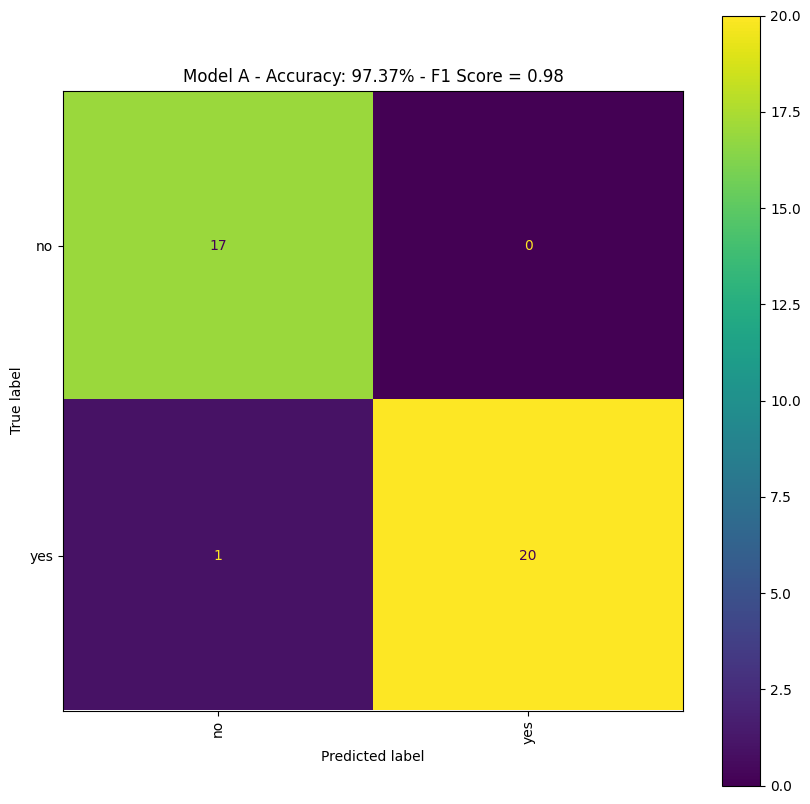

2/2 [==============================] - 2s 475ms/step
Percentage Correct = 71.05%


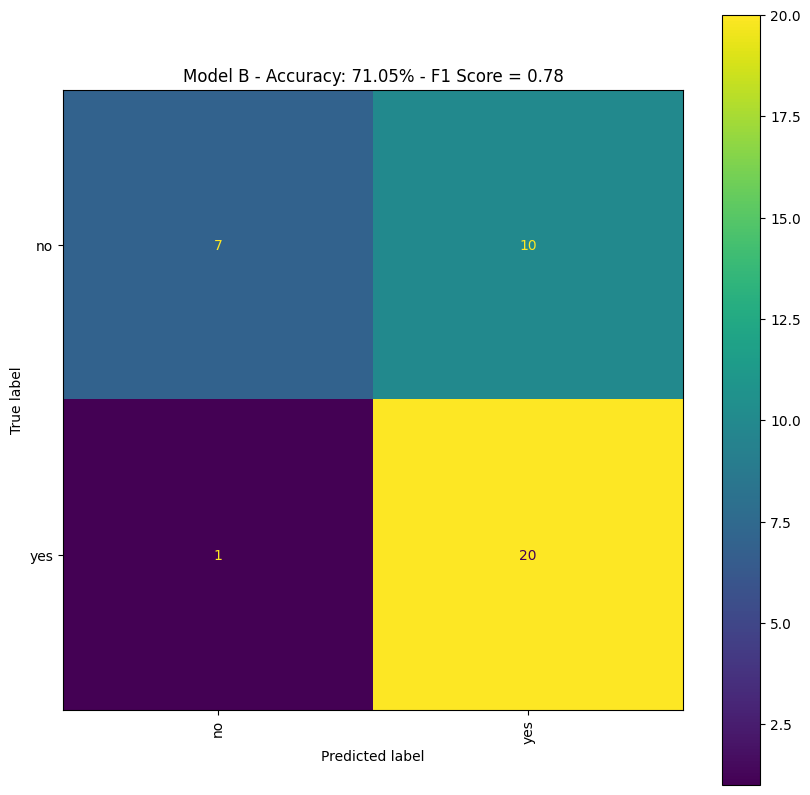

In [25]:
for i, model in enumerate([model_A,model_B]):
    result = model.predict(np.stack(images))
    pred_array = [[0,1][np.argmax(individual_result)] for individual_result in result]

    simple_true = 0
    for pred, label in zip(pred_array, labels):
        if np.where(label == 1)[0][0] == pred:
            simple_true += 1

    print(f"Percentage Correct = {round((simple_true * 100)/len(labels),2)}%")

    y_actual = []
    for pred in y_test:    
        if pred[0] == 1:
            y_actual.append(0)
        if pred[1] == 1:
            y_actual.append(1)

    f1 = f1_score([l[1] for l in labels],pred_array,pos_label=1)

    fig, ax = plt.subplots(figsize=(10, 10))
    cm = ConfusionMatrixDisplay.from_predictions(
            y_actual,
            pred_array,
            ax=ax,
            xticks_rotation=90,
            colorbar=True,
            display_labels = ["no","yes"]
    )
    plt.title(f"Model {['A','B'][i]} - Accuracy: {round(simple_true * 100/len(labels),2)}% - F1 Score = {round(f1,2)}")
    plt.show()
